# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mouse_Data = pd.merge (mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
Mouse_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [55]:
# Checking the number of mice.
Mouse_count = len(Mouse_Data ["Mouse ID"].unique()) 
Mouse_count

249

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = Mouse_Data.loc[Mouse_Data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_Data[Mouse_Data. duplicated("Mouse ID")] 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = Mouse_Data
cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(Mouse_Data[ "Mouse ID"].unique())
num_mice

249

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = Mouse_Data['Tumor Volume (mm3)'].groupby(Mouse_Data['Drug Regimen']).mean()
median = Mouse_Data['Tumor Volume (mm3)'].groupby(Mouse_Data['Drug Regimen']).median()
var = Mouse_Data['Tumor Volume (mm3)'].groupby(Mouse_Data['Drug Regimen']).var()
std = Mouse_Data['Tumor Volume (mm3)'].groupby(Mouse_Data['Drug Regimen']).std()
sem = Mouse_Data['Tumor Volume (mm3)'].groupby(Mouse_Data['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.

summary_sts = pd.DataFrame({"Mean Tumor Volume" : mean,
                             "Median Tumor Volume" : median,
                             "Variance Tumor Volume" : var,
                             "Standard Deviation Tumor Volume" : std,
                             "Standard Error Tumor Volume" : sem
                             }
                            )
summary_sts

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  Mouse_Data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [62]:
#display of numbrs for bar graph
count_of_mice = Mouse_Data["Drug Regimen"].value_counts()
count_of_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

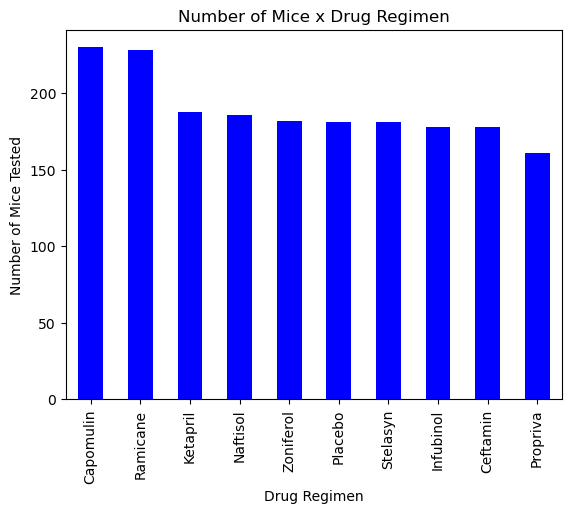

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice x Drug Regimen")
plt.xticks(rotation = "vertical")

regimen_per_mice = count_of_mice.plot.bar(color = "blue")

<BarContainer object of 10 artists>

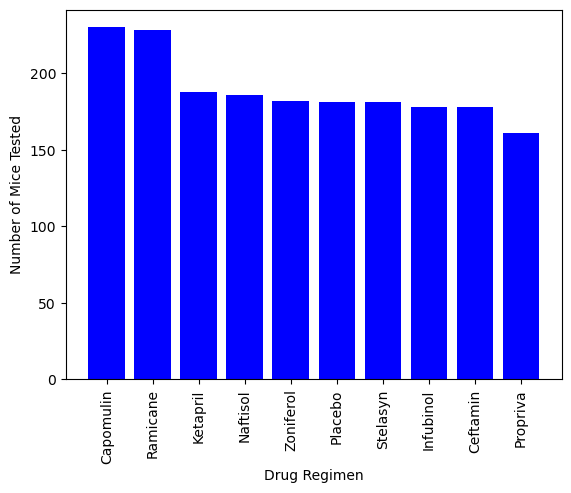

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = count_of_mice.index.values
y_axis = count_of_mice.values

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = "vertical")

plt.bar(x_axis, y_axis, color = "blue", alpha = 1, align = "center")

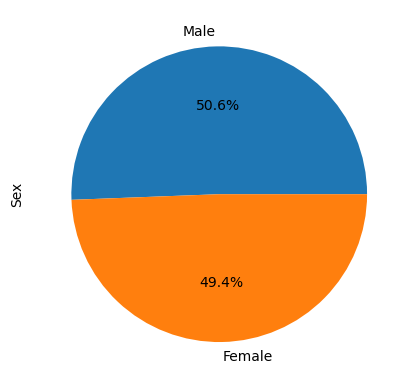

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = Mouse_Data["Sex"].value_counts()
gender_data.plot.pie(autopct = "%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Last_time = Mouse_Data.groupby("Mouse ID").max()["Timepoint"]

# Display the summary
Last_time.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Mouse_time = pd.DataFrame(Last_time)
Timepoint_merge = pd.merge(Mouse_time, Mouse_Data, on = ("Mouse ID", "Timepoint"), how = "left")
Timepoint_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_df = Mouse_Data.loc[Mouse_Data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Mouse_Data.loc[Mouse_Data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Mouse_Data.loc[Mouse_Data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Mouse_Data.loc[Mouse_Data["Drug Regimen"] == "Ceftamin", :]


# Create empty list to fill with tumor vol data (for plotting)
plotting_list = ["Capomulin_df", "Ramicane_df", "Infubinol_df", "Ceftamin_df"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
IQR = Mouse_Data['col'][Mouse_Data['col'].between(Mouse_Data['col'].quantile(.25), Mouse_Data['col'].quantile(.75), inclusive=True)]


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Drug_r = clean_df[clean_df["Drug Regimen"].isin(Regimen_list)]
Drug_r.head()
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

KeyError: 'col'

In [ ]:

    Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

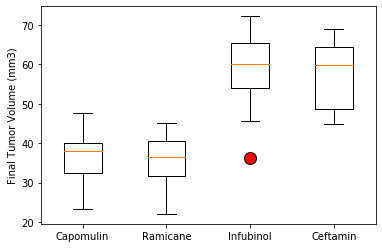

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

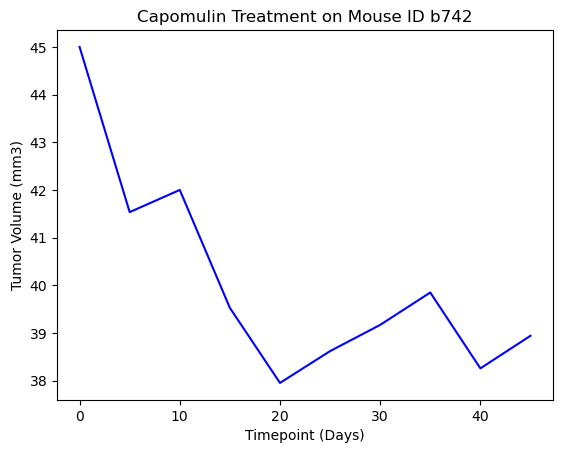

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_Cap = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742", :]

x_axis = mouse_Cap["Timepoint"]
y_axis = mouse_Cap["Tumor Volume (mm3)"]
mouse_Cap.head()

fig1, ax1 = plt.subplots()
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment on Mouse ID b742")
plt.plot(x_axis, y_axis, color = "b")

plt.show()

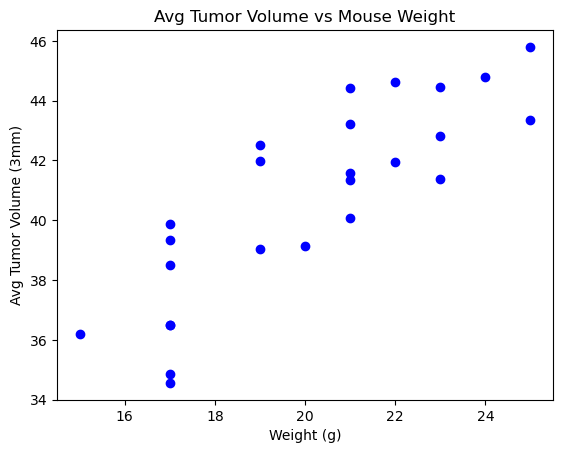

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_avg = Capomulin_df.groupby(["Mouse ID"]).mean()

x_axis = Capomulin_avg["Weight (g)"]
y_axis = Capomulin_avg["Tumor Volume (mm3)"]

plt.title("Avg Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (3mm)")
plt.scatter(x_axis, y_axis, color = "blue" )

plt.show()

## Correlation and Regression

 correlation of mouse weight/the average tumor volume 0.84


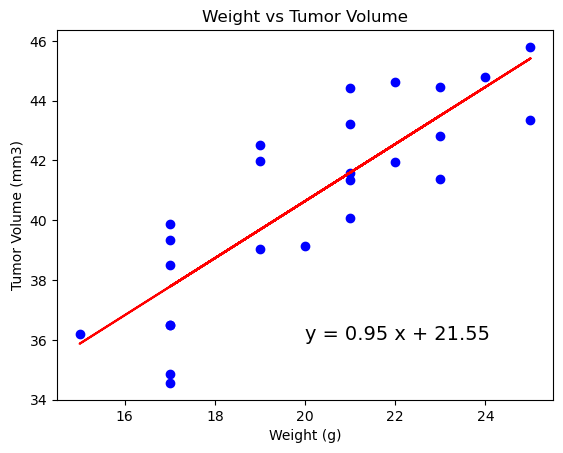

In [87]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
print(f" correlation of mouse weight/the average tumor volume {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"])
regress_values=Capomulin_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"],color='b')
plt.plot(Capomulin_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume")
plt.show()